<a href="https://colab.research.google.com/github/khavitidala/fuyukai-desu/blob/main/ulmfit/raw_ulmfit_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastbook import *
from fastai.text.all import *
import pandas as pd
import numpy as np

In [ ]:
path = Path("data/")

In [ ]:
get_corp = partial(get_text_files, folders=['wiki'])
dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_corp, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=64, seq_len=72)

In [ ]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()], pretrained=False).to_fp16()

In [ ]:
learn.model.cuda()

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60008, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60008, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60008, bias=True)
    (output_dp): RNNDropout()
  )
)

/opt/conda/lib/python3.8/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.00015848931798245758)

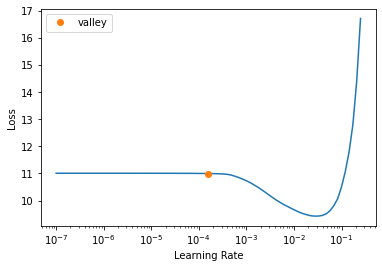

In [ ]:
learn.lr_find()

In [ ]:
# the connection was error accidentally, so 10epoch.pth just save a model which has been trained on 2 epoch
learn.load('10epoch')

In [ ]:
# continue training on the last 8 epoch
learn.fit_one_cycle(8, 0.00015, wd=0.1, cbs=SaveModelCallback(fname='10epoch',at_end=True))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.624261,3.552382,0.397994,34.896351,1:30:34
1,3.515591,3.521508,0.401492,33.835430,1:27:26
2,3.512795,3.482150,0.406615,32.529587,1:27:38
3,3.512932,3.455889,0.409852,31.686460,1:27:19
4,3.483307,3.432370,0.412673,30.949921,1:25:58
5,3.414558,3.416905,0.414764,30.474947,1:26:03
6,3.512701,3.407069,0.416124,30.176659,1:26:53
7,3.439959,3.404470,0.416444,30.098331,1:43:34


Better model found at epoch 0 with valid_loss value: 3.552382230758667.
Better model found at epoch 1 with valid_loss value: 3.5215084552764893.
Better model found at epoch 2 with valid_loss value: 3.482150077819824.
Better model found at epoch 3 with valid_loss value: 3.4558894634246826.
Better model found at epoch 4 with valid_loss value: 3.43237042427063.
Better model found at epoch 5 with valid_loss value: 3.416904926300049.
Better model found at epoch 6 with valid_loss value: 3.4070687294006348.
Better model found at epoch 7 with valid_loss value: 3.4044697284698486.


In [ ]:
learn.summary()

SequentialRNN (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     []                  
LSTM                                                           
LSTM                                                           
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
____________________________________________________________________________
                     64 x 72 x 60008     
Linear                                    24063208   True      
RNNDropout                                                     
____________________________________________________________________________

Total params: 24,063,208
Total trainable params: 24,063,208
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7f93c80cce50>
Loss functio